<a href="https://colab.research.google.com/github/tamaranindt26/CustomerSegmentation-KMeans/blob/main/K_Means_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library



In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
%matplotlib inline

# Import Data Set

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/segmentation data.csv")
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


# Cek Missing Value

In [ ]:
data.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

# Menyamakan nilai data

In [ ]:
data_scaled = data
data_scaled[data_scaled.columns] = StandardScaler().fit_transform(data)

In [ ]:
kmeans_cb = KMeans(n_clusters=3)
kmeans_cb.fit(data_scaled)
y_kmeans = kmeans_cb.predict(data_scaled)
centers = kmeans_cb.cluster_centers_
kmeans_cb.inertia_

10195.676265168322

# Mengubah data menjadi 2 dimensi

In [ ]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(data_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

Explained variation per principal component: [0.34103573 0.23178599]


34.10 % data ada pada PCA 1 dan 23.17% data ada pada pca 2

data hasil pca merepresentasikan 57,28% dari data asli

([<matplotlib.axis.XTick at 0x7fd8383a9a90>,
 <a list of 2 Text major ticklabel objects>)

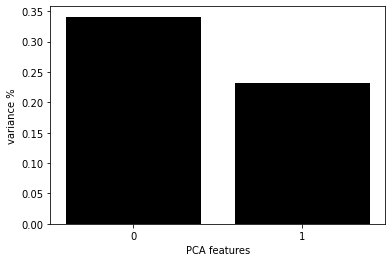

In [ ]:
features = range(pca_2.n_components_)
plt.bar(features, pca_2.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [ ]:
pca_2_result.shape

(2000, 2)

In [ ]:
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 57.28%


# Visualisasi Data

Text(0, 0.5, 'PCA 2')

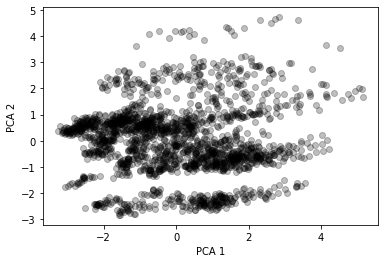

In [ ]:
PCA_components = pd.DataFrame(pca_2_result)
plt.scatter(PCA_components[0], PCA_components[1], alpha=0.25, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Menentukan jumlah cluster paling optimal menggunakan silhouette

Parameter: {'n_clusters': 2} Score 0.23490650281387093
Parameter: {'n_clusters': 3} Score 0.23942785769123712
Parameter: {'n_clusters': 4} Score 0.21111612014440584
Parameter: {'n_clusters': 5} Score 0.18543617659584397
Parameter: {'n_clusters': 10} Score 0.15309730155008913
Parameter: {'n_clusters': 12} Score 0.16541136202463333
Parameter: {'n_clusters': 20} Score 0.1279058113315119


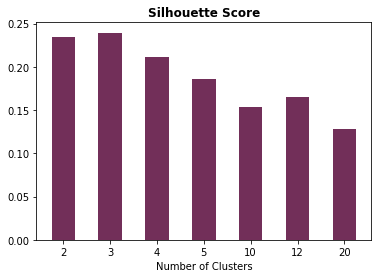

In [ ]:
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 10, 12, 20]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(PCA_components)          # fit model on dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

# Clustering kmeans dengan K = 3

3578.4050454143667

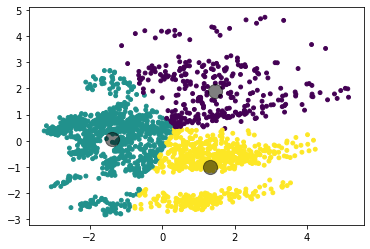

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(PCA_components)
y_kmeans = kmeans.predict(PCA_components)
centers = kmeans.cluster_centers_
plt.scatter(PCA_components[0], PCA_components[1], c=y_kmeans, s=15, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
kmeans.inertia_

## cara lain

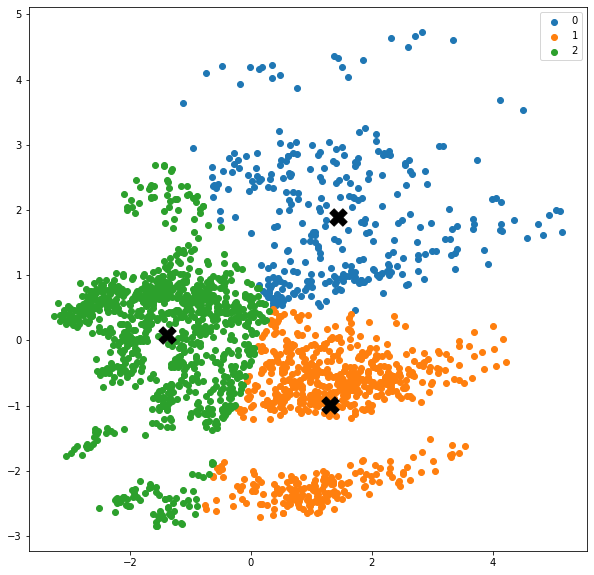

In [ ]:
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(pca_2_result)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(pca_2_result[label == i , 0] , pca_2_result[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker= 'X', c='k', s=300)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()